In [11]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

In [2]:
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 64s 1us/step


## Extracting features using VGG

In [3]:
img_path = 'data/Evilmorty.JPG'
img = image.load_img(img_path, target_size=[224, 224])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x= preprocess_input(x)

In [5]:
features = model.predict(x)
print(features.shape)

(1, 7, 7, 512)


## Extract features from an intermediate layer with VGG

In [14]:
base_model = VGG16()
base_model.summary()
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

553467904/553467096 [==============================] - 461s 1us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [15]:
bl_4_features = model.predict(x)
print(bl_4_features.shape)

(1, 14, 14, 512)


In [20]:
filters, bias = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

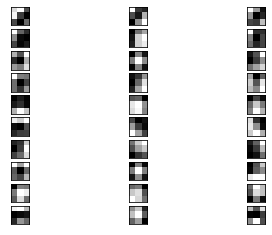

In [21]:
import matplotlib.pyplot as plt
n_filters, idx = 10, 1
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = plt.subplot(n_filters, 3, idx)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:,:,j], cmap='gray')
        idx += 1

In [22]:
for layer in model.layers:
    print(layer.name, layer.output)

input_4 Tensor("input_4:0", shape=(None, 224, 224, 3), dtype=float32)
block1_conv1 Tensor("block1_conv1/Relu_3:0", shape=(None, 224, 224, 64), dtype=float32)
block1_conv2 Tensor("block1_conv2/Relu_3:0", shape=(None, 224, 224, 64), dtype=float32)
block1_pool Tensor("block1_pool/MaxPool_3:0", shape=(None, 112, 112, 64), dtype=float32)
block2_conv1 Tensor("block2_conv1/Relu_3:0", shape=(None, 112, 112, 128), dtype=float32)
block2_conv2 Tensor("block2_conv2/Relu_3:0", shape=(None, 112, 112, 128), dtype=float32)
block2_pool Tensor("block2_pool/MaxPool_3:0", shape=(None, 56, 56, 128), dtype=float32)
block3_conv1 Tensor("block3_conv1/Relu_3:0", shape=(None, 56, 56, 256), dtype=float32)
block3_conv2 Tensor("block3_conv2/Relu_3:0", shape=(None, 56, 56, 256), dtype=float32)
block3_conv3 Tensor("block3_conv3/Relu_3:0", shape=(None, 56, 56, 256), dtype=float32)
block3_pool Tensor("block3_pool/MaxPool_3:0", shape=(None, 28, 28, 256), dtype=float32)
block4_conv1 Tensor("block4_conv1/Relu_3:0", shape